 # 6. Orthogonal Matrices

In [458]:
import random
from spb import (
    plot,
    plot_parametric,
    plot_real_imag
)
from spb.defaults import cfg
from sympy import (
    Abs,
    And,
    conjugate,
    cos,
    Eq,
    eye,
    Ge,
    I,
    im,
    IndexedBase,
    MatMul,
    Matrix,
    MatrixSymbol,
    N,
    pi,
    re,
    sin,
    Symbol
)

cfg['matplotlib']['show_minor_grid'] = True

In [281]:
i = eye(2)
i

Matrix([
[1, 0],
[0, 1]])

In [282]:
A = Matrix([[1, 0], [0, 1]])
A

Matrix([
[1, 0],
[0, 1]])

In [283]:
And(
    Eq(i, A.T * A),
    Eq(i, A * A.T,)
)

True

In [284]:
A.det()

1

In [285]:
eigen_val, _, eigen_vecs = A.eigenvects()[0]
lambda_ = eigen_val
lambda_

1

In [286]:
eigen_vec_1, eigen_vec_2 = eigen_vecs
X = eigen_vec_1
X

Matrix([
[1],
[0]])

In [287]:
A * X

Matrix([
[1],
[0]])

In [288]:
Eq(A * X, X * lambda_)

True

In [289]:
theta = Symbol('θ')

A_theta = Matrix([[cos(theta), -sin(theta)], [sin(theta), cos(theta)]])
A_theta

Matrix([
[cos(θ), -sin(θ)],
[sin(θ),  cos(θ)]])

In [290]:
A * A_theta.subs(theta, pi)

Matrix([
[-1,  0],
[ 0, -1]])

In [291]:
Eq(A, A_theta.subs(theta, pi*2))

True

In [292]:
p1 = Matrix([1, 0])
p1

Matrix([
[1],
[0]])

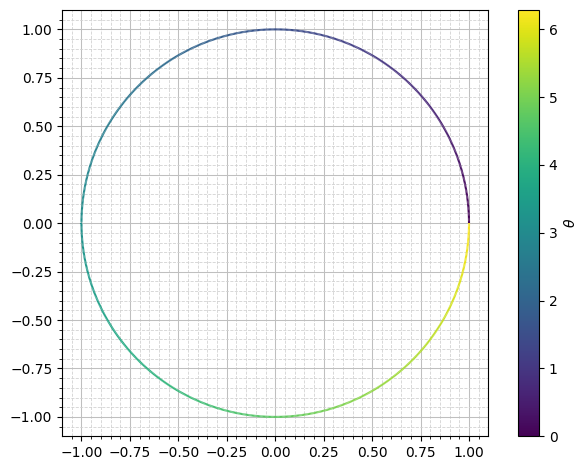

In [293]:
plot_parametric(
    *(A_theta*p1),
    (theta, 0, 2*pi),
    aspect='equal'
)

In [294]:
A_theta.charpoly()

PurePoly(lambda**2 - 2*cos(θ)*lambda + 1, lambda, domain='ZZ[cos(θ)]')

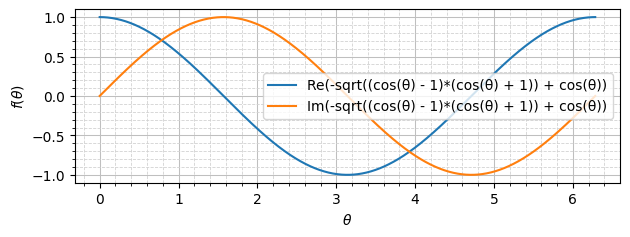

In [295]:
plot_real_imag(
    list(A_theta.eigenvals())[0],
    (theta, 0, 2*pi),
    aspect='equal'
)

In [296]:
[list(A_theta.subs(theta, pi*x).eigenvals())[0].is_real for x in range(1, 3)]

[True, True]

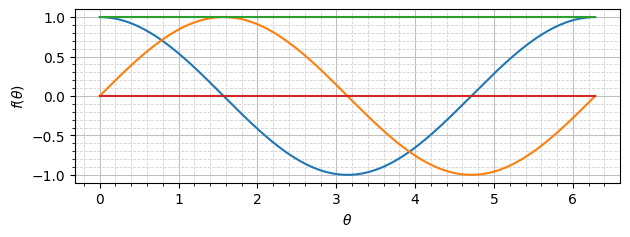

In [297]:
plot_real_imag(
    list(A_theta.eigenvals())[0],
    Abs(list(A_theta.eigenvals())[0]),
    (theta, 0, pi*2),
    aspect='equal',
    legend=False
)

In [298]:
Xc = Matrix([0.5+1*I, 1-0.5*I])
Xc

Matrix([
[  0.5 + I],
[1 - 0.5*I]])

In [299]:
x_i = IndexedBase('x')
y_i = IndexedBase('y')

C_inner_prod = x_i[0]*y_i[0] + x_i[1]*y_i[1]
C_inner_prod

x[0]*y[0] + x[1]*y[1]

In [300]:
A_conjugated = conjugate(A)
C_inner_prod.subs({x: Xc.T, y: A_conjugated.col(0).T})

0.5 + I

In [301]:
y = Symbol('y')
y

y

In [302]:
conjugate(y)

conjugate(y)

In [303]:
ge1 = Ge(y * conjugate(y), 0)
ge1

y*conjugate(y) >= 0

In [304]:
ge1.subs(y, 1+0.5*I)

True

In [305]:
u1 = MatrixSymbol('u', 2, 1)
u2 = MatrixSymbol('u', 1, 2)
v1 = MatrixSymbol('v', 1, 2)
v2 = MatrixSymbol('v', 2, 1)

eq2 = Eq(MatMul(v1, u1), conjugate(MatMul(u2, v2)), evaluate=False)
eq2

Eq(v*u, Adjoint((u*v).T))

In [306]:
v_mat = Matrix([1+1*I, 3*I])
v_mat

Matrix([
[1 + I],
[  3*I]])

In [307]:
v_mat.H

Matrix([[1 - I, -3*I]])

In [308]:
u_mat = Matrix([2-.7*I, 4])

eq2.subs({v1: v_mat.H, v2: v_mat, u1: u_mat, u2: u_mat.H}).doit()

True

In [423]:
class On:
    def __init__(self, n):
        self.n = n
    def get_random_matrix(self):
        total_nos = self.n**2
        rand_nos = [random.uniform(-1, 1) for _ in range(0, total_nos)]
        mat = Matrix(self.n, self.n, rand_nos)
        rows = [mat.row(x) for x in range(0, self.n)]
        rows = Matrix.orthogonalize(*rows, normalize=True)
        return Matrix.vstack(*rows)

O2 = On(2)
O2_1 = O2.get_random_matrix()
O2_1

Matrix([
[-0.908924651592751, -0.416960403068441],
[  0.41696040306844, -0.908924651592751]])

In [463]:
def is_orthonormal(mat):
    return Eq(Abs(N(mat.det(), 3)), 1)

all([is_orthonormal(O2.get_random_matrix()) for _ in range(0, 10)])

True

In [460]:
O3 = On(3)
O3_1 = O3.get_random_matrix()
O3_1

Matrix([
[-0.494781803324718,  0.259768793086459, -0.829283510771283],
[-0.577087692927119, -0.811702326712781, 0.0900506939513084],
[-0.649738995113265,  0.523124752757372,  0.551524914470546]])

In [464]:
O3_2 = O3.get_random_matrix()
O3_2

Matrix([
[ 0.841706855706767, -0.0650995033610621,  -0.535995917632188],
[-0.112299640984631,   -0.99210333750585, -0.0558547969692449],
[-0.528127219229374,   0.107205514652446,  -0.842370831603964]])

In [465]:
is_orthonormal(O3_1 * O3_2)

True

In [469]:
def is_proper_orthonomal(mat):
    return Eq(N(mat.det(), 3), 1)

all([is_proper_orthonomal(O3.get_random_matrix()) for _ in range(0, 10)])

False

In [471]:
class SOn:
    def __init__(self, n):
        self.base = On(n)
    def get_random_matrix(self):
        while True:
            mat = self.base.get_random_matrix()
            if Eq(mat.det(), 1):
                break
        return mat

SO3 = SOn(3)
SO3.get_random_matrix()

Matrix([
[-0.325013311661129, -0.348890721477138, -0.879000347957967],
[ 0.879977005855756, -0.452037945898796,  -0.14595261091442],
[-0.346420000011843, -0.820936635761104,  0.453934162249369]])

In [472]:
all([is_proper_orthonomal(SO3.get_random_matrix()) for _ in range(0, 10)])

True